In [1]:
# System
import os

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Data
import numpy as np
import pandas as pd

# View
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from IPython.display import Image

# ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# ML Models
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# Utilities Files
def read_csv(name: str, index_label='id') -> pd.DataFrame:
    return pd.read_csv('../data/' + name + '.csv', index_col=index_label)


def save_csv(df: pd.DataFrame, name: str, index_label='id'):
    df.to_csv('../data/' + name + '.csv', index_label=index_label)

def show_image(name: str):
    return Image(filename= '../images/' + name + '.png')

In [3]:
# Development Flags
SHOW_IN_RELEASE = False
SHOW_IN_DEVELOPMENT = True

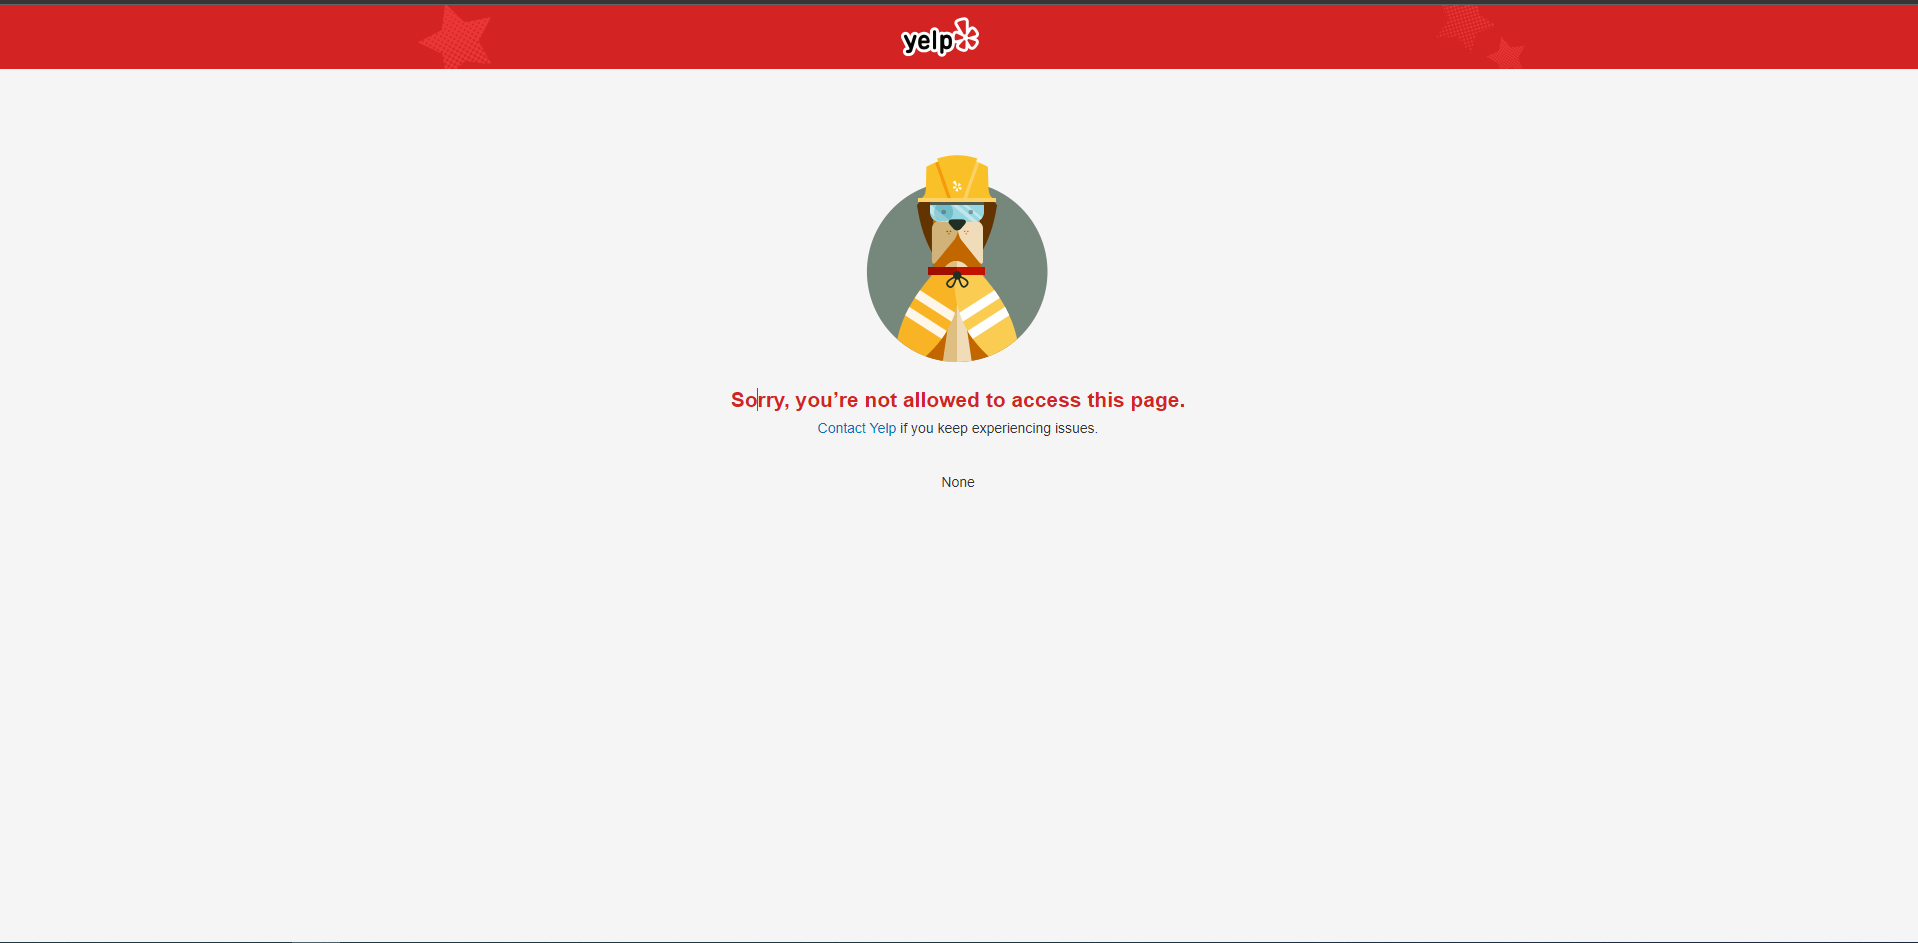

In [4]:
show_image('Sorry')

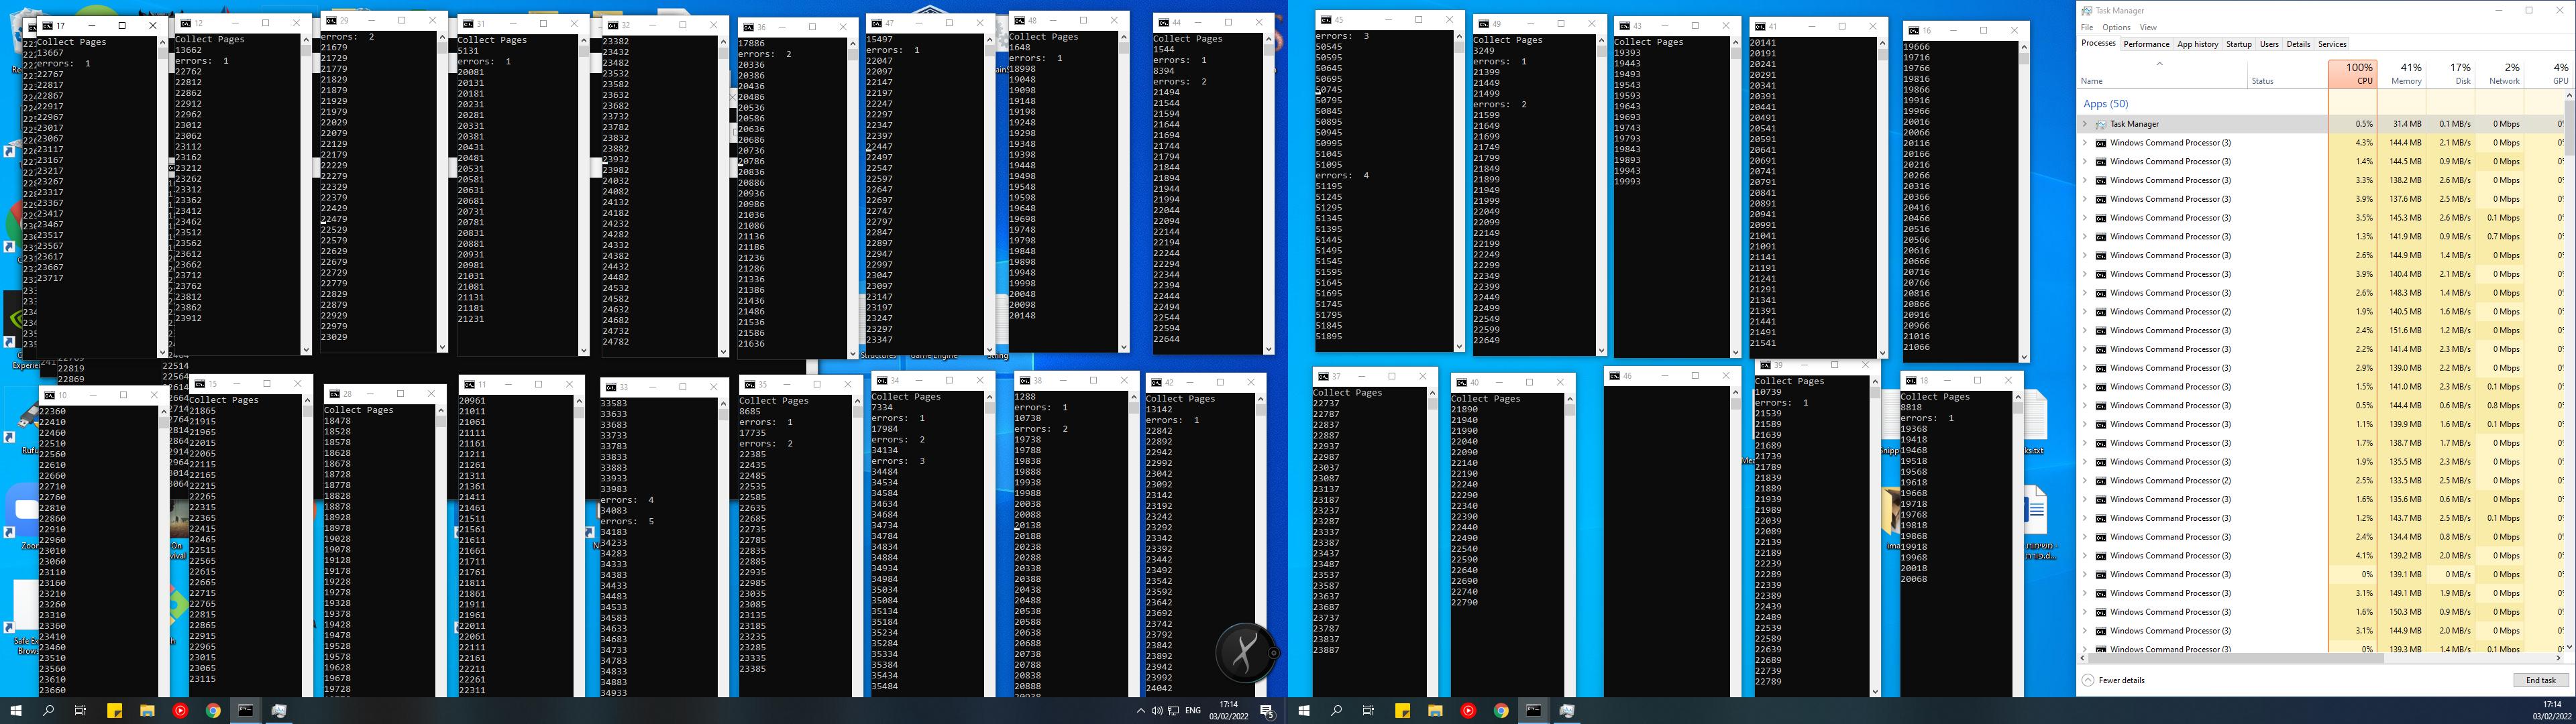

In [5]:
show_image('Data_Collectors')

In [6]:
df_original = read_csv('businesses')
#df_original = df_original.head(5000)

df = df_original.copy()

df.drop(["Url", "Name", "ExpensiveLevel", "SubCategories", "AttributesHas"], axis=1, inplace=True)

In [7]:
Y = target = df["HasExpensiveLevel"]
X = data = df.drop(["HasExpensiveLevel"], axis=1)
x_train, x_finale_test, y_train, y_finale_test = train_test_split(X, Y, test_size=0.03, random_state=69)

In [8]:
df = df_train = pd.concat([y_train, x_train], axis=1)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
# First Visuation for undsending the data

# Config
legend_colors = ['tab:blue', 'tab:orange']

In [11]:
target_column = "HasExpensiveLevel"
target_column_label = "Is Expensive"
target_column_label_true = "Is Expensive"
target_column_label_false = "Is not Expensive"

prime_flag_columns = [
    'Claimed', 'HasWebsite'
]

prime_countable_columns = [
    'Stars',
    'SubCategoriesCount', 'AttributesCount',
    'QuestionsCount', 'WeeklyBreaks', 'WeeklyDays'
]
prime_non_countable_columns = [
     'Reviews', 'Photos',
    'WeeklyHours'
]

prime_columns = prime_flag_columns + prime_countable_columns + prime_non_countable_columns

In [12]:
# Numberic Visuation
df[prime_columns + [target_column]].describe()

,Claimed,HasWebsite,Stars,SubCategoriesCount,AttributesCount,QuestionsCount,WeeklyBreaks,WeeklyDays,Reviews,Photos,WeeklyHours,HasExpensiveLevel
count,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000
mean,0.674751,0.816376,8.359454,2.085247,3.912785,3.655606,0.692232,4.979908,293.905180,383.056075,108.337092,0.342730
std,0.468477,0.387185,0.965525,0.832565,1.012783,0.720185,1.873341,1.863496,583.564754,843.154230,57.668911,0.474631
min,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,8.000000,1.000000,4.000000,4.000000,0.000000,5.000000,19.000000,34.000000,72.000000,0.000000
50%,1.000000,1.000000,8.000000,2.000000,4.000000,4.000000,0.000000,6.000000,94.000000,124.000000,114.000000,0.000000
75%,1.000000,1.000000,9.000000,3.000000,4.000000,4.000000,0.000000,6.000000,318.000000,387.000000,148.000000,1.000000
max,1.000000,1.000000,10.000000,4.000000,9.000000,4.000000,14.000000,6.000000,16981.000000,31726.000000,336.000000,1.000000


In [13]:
# Visuation per column and between columns

def disply_count_of_flag_column(column_name: str, column_label: str, true_label: str, false_label: str, labels: list):
    global legend_colors, df, target_column
    
    df_sp = df[[target_column, column_name]]
    
    count_df = df_sp.groupby([column_name]).count()
    
    count_true_has = df_sp[df_sp[column_name] == 1][target_column].sum()
    count_true_not_has = df_sp[df_sp[column_name] == 1][target_column].count() - count_true_has
    
    count_false_has = df_sp[df_sp[column_name] == 0][target_column].sum()
    count_false_not_has = df_sp[df_sp[column_name] == 0][target_column].count() - count_false_has
    
    # Main elements    
    fig = plt.figure(figsize = [16, 8])
    
    fig.suptitle(column_label)
    
    ax_graf =  fig.add_subplot(1, 3, 1)
    ax_true =  fig.add_subplot(1, 3, 2)
    ax_false = fig.add_subplot(1, 3, 3) 
        
    # Graf
    plt.sca(ax_graf)
    ax_graf.bar( [true_label,false_label], count_df[target_column].values)
    plt.xlabel(true_label)
    plt.ylabel("Count")
    
    # Pies
    plt.sca(ax_true)
    plt.title(true_label)
    
    ax_true.pie([count_true_has, count_true_not_has],
                radius=4,
                center=(4, 4),
                startangle=90,
                autopct='%1.0f%%',
                colors=legend_colors)
    
    ax_true.set(xlim=(0, 8), ylim=(0, 8))
        
    plt.sca(ax_false)
    plt.title(false_label)
    ax_false.pie([count_false_has, count_false_not_has],
                radius=4,
                center=(4, 4),
                startangle=90,
                autopct='%1.0f%%',
                colors=legend_colors)
    
    ax_false.set(xlim=(0, 8), ylim=(0, 8))
    
    # show        
    handles = []
    for i in range(len(labels)):
        handles.append(matplotlib.patches.Patch(label=labels[i], color=legend_colors[i]))

    fig.legend(handles=handles, loc ="lower right")
    
    plt.show()


In [14]:
def disply_atter_per_column(inedexs: list, values: list, columns_label: list):
    global legend_colors, target_column, target_column_label
    
    # Main elements    
    fig = plt.figure(figsize = [16, 8])
        
    for i in range(len(values)):        
        value = values[i]
        if value is not None:
            index = indexs[i]
            label = columns_label[i]
                    
            # Graf
            ax_graf =  fig.add_subplot(1, len(values), i+1)
        
            plt.sca(ax_graf)
            plt.plot(index, value)
            plt.xlabel(label)
            plt.ylabel(target_column_label)
    
    plt.show()

In [15]:
def disply_mluti_bars(inedexs: list, values: list, indexs_label, values_label, w: int):
    global legend_colors
    
    values += np.full(elements_in_line-len(values)%elements_in_line, None).tolist()
    inedexs += np.full(elements_in_line-len(values)%elements_in_line, None).tolist()
    
    h = int(len(values) / elements_in_line)
    
    # Main elements 
    fig = plt.figure(figsize = [16, h * 8])
    
    gs = fig.add_gridspec(h, w)
    
    line = 0
    while len(values) > 0:
        now_values = values[:elements_in_line]
        now_inedexs = inedexs[:elements_in_line]
                
        for i in range(w):        
            value = now_values[i]
            if value is not None:
                index = now_inedexs[i]
                value = now_values[i]
            
                index_label = indexs_label
                value_label = values_label
                if type(indexs_label) == list:
                    index_label = indexs_label[i]
            
                if type(values_label) == list:
                    value_label = values_label[i]
            
                # Graf
                ax_graf = fig.add_subplot(gs[line, i])
        
                plt.sca(ax_graf)
                plt.bar(index, value)
                plt.xlabel(index_label)
                plt.ylabel(value_label)
                
        values = values[elements_in_line:]
        inedexs = inedexs[elements_in_line:]
        
        if type(indexs_label) == list:
            indexs_label = indexs_label[elements_in_line:]
            
        if type(values_label) == list:
            values_label = values_label[elements_in_line:]
        
        line += 1
    
    plt.show()

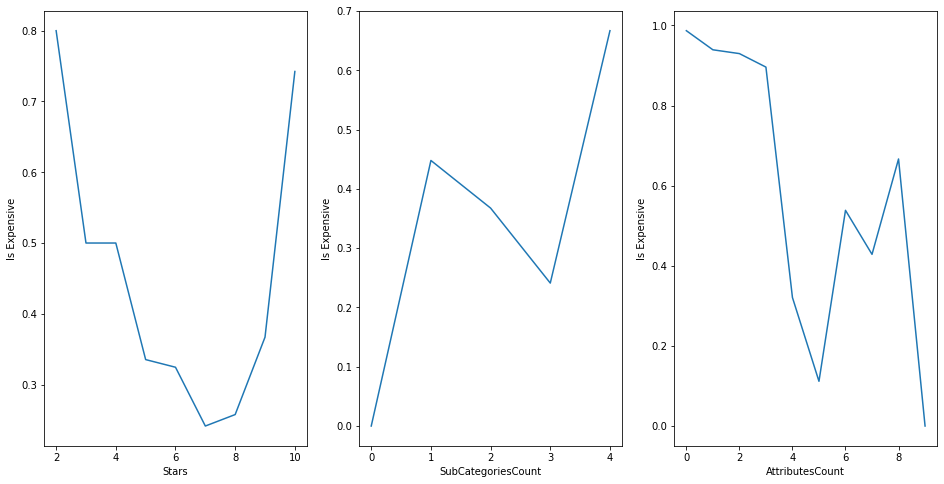

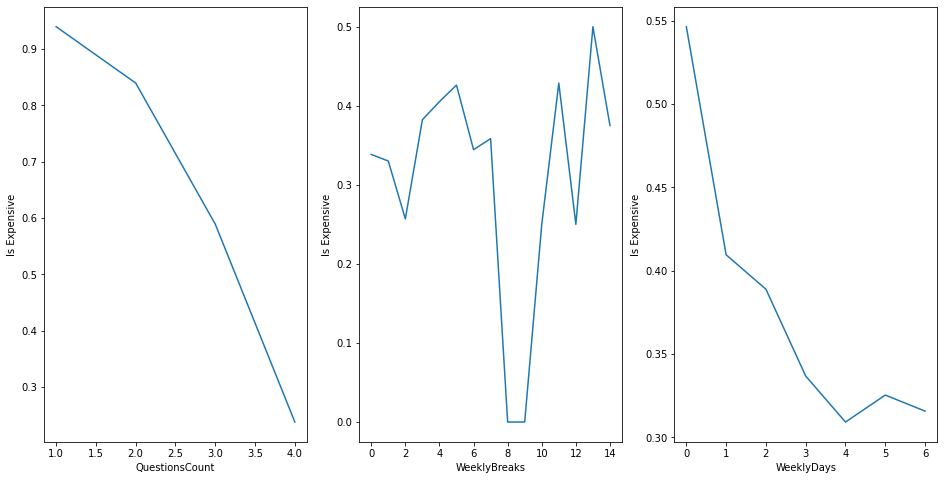

<Figure size 1152x576 with 0 Axes>

In [16]:
# Shows the average of "Has Expensive Level" for every column by value
# Average of "Has Expensive Level" symbolizes how likely it is to have expensive level

if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_countable_columns
    atter_name = 'mean'
    
    elements_in_line = 3
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                atter_df = df[[target_column, column]].groupby([column])
                atter_df = getattr(atter_df, atter_name)()
            
                indexs += [atter_df.index]
                values += [atter_df[target_column].values]            
        
        disply_atter_per_column(indexs, values, printed_columns[:elements_in_line])
        printed_columns = printed_columns[elements_in_line:]

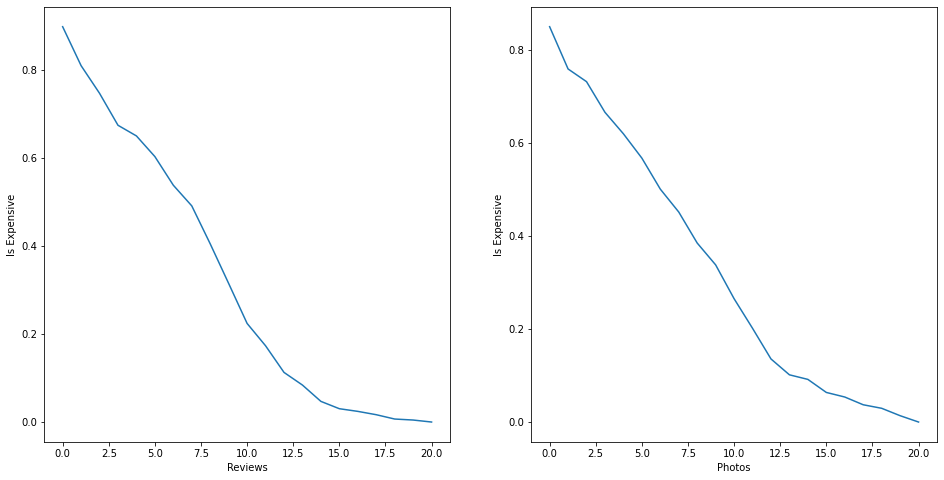

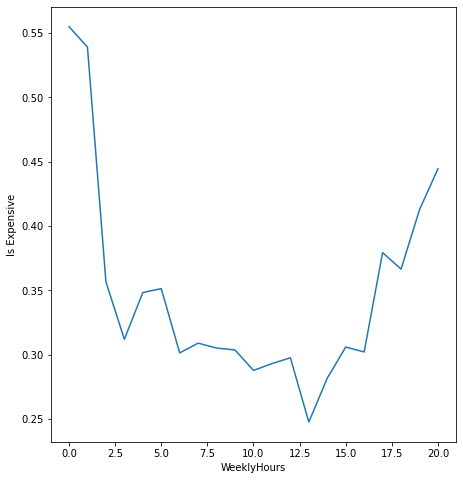

In [17]:
## calculates the probability based on sections

if SHOW_IN_DEVELOPMENT:
    
    sections=20
    atter_name = 'mean'
    elements_in_line = 2
    printed_columns = prime_non_countable_columns
    
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                new_df = df[[target_column, column]].sort_values(column)
                length = len(new_df)
                new_df["Sections"] = df.index//(length//sections)
                section_name = range(0,100,100//sections)
                atter_df = new_df[[target_column, "Sections"]].groupby(["Sections"])
                atter_df = getattr(atter_df, atter_name)()
            
                indexs += [atter_df.index]
                values += [atter_df[target_column].values]            
        
        disply_atter_per_column(indexs, values, printed_columns[:elements_in_line])
        printed_columns = printed_columns[elements_in_line:]

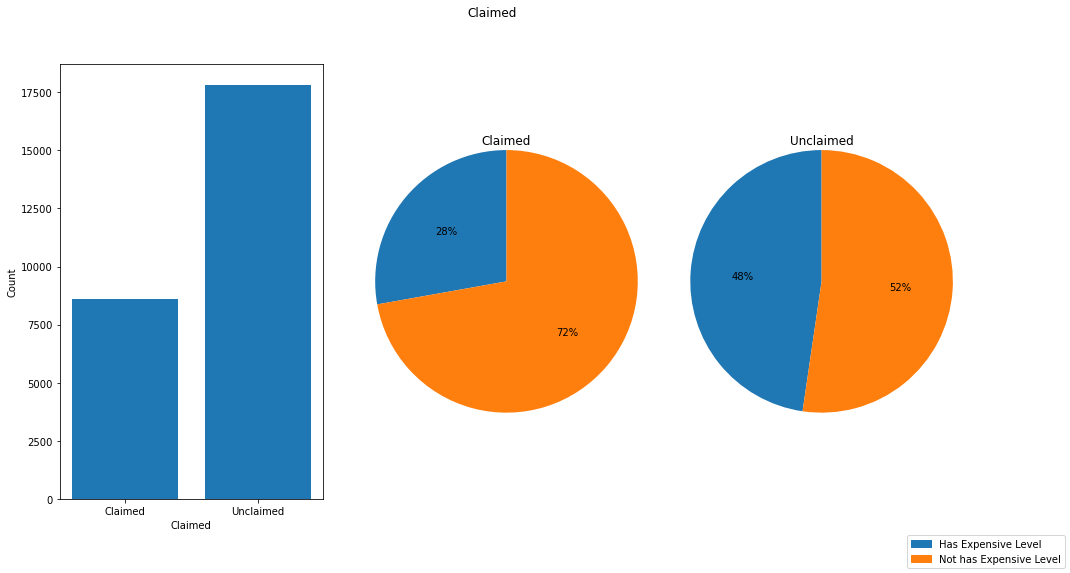

In [18]:
# Shows Claimed

if SHOW_IN_DEVELOPMENT: 
    disply_count_of_flag_column('Claimed', 'Claimed', 'Claimed', 'Unclaimed',
                                ['Has Expensive Level', 'Not has Expensive Level'])


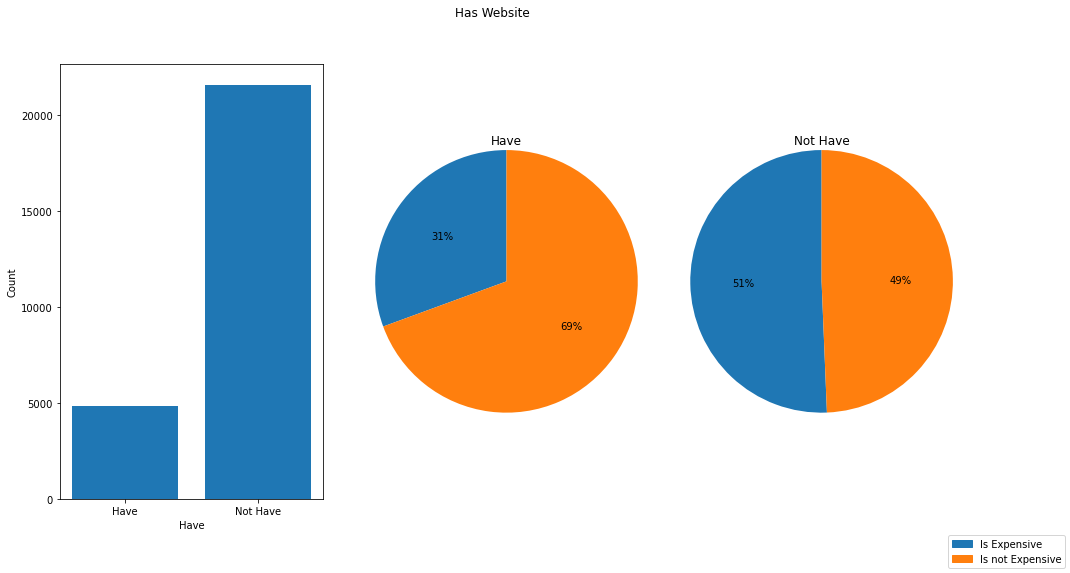

In [19]:
# Has Website

if SHOW_IN_DEVELOPMENT:
    disply_count_of_flag_column('HasWebsite', 'Has Website', 'Have', 'Not Have',
                                [target_column_label_true, target_column_label_false])

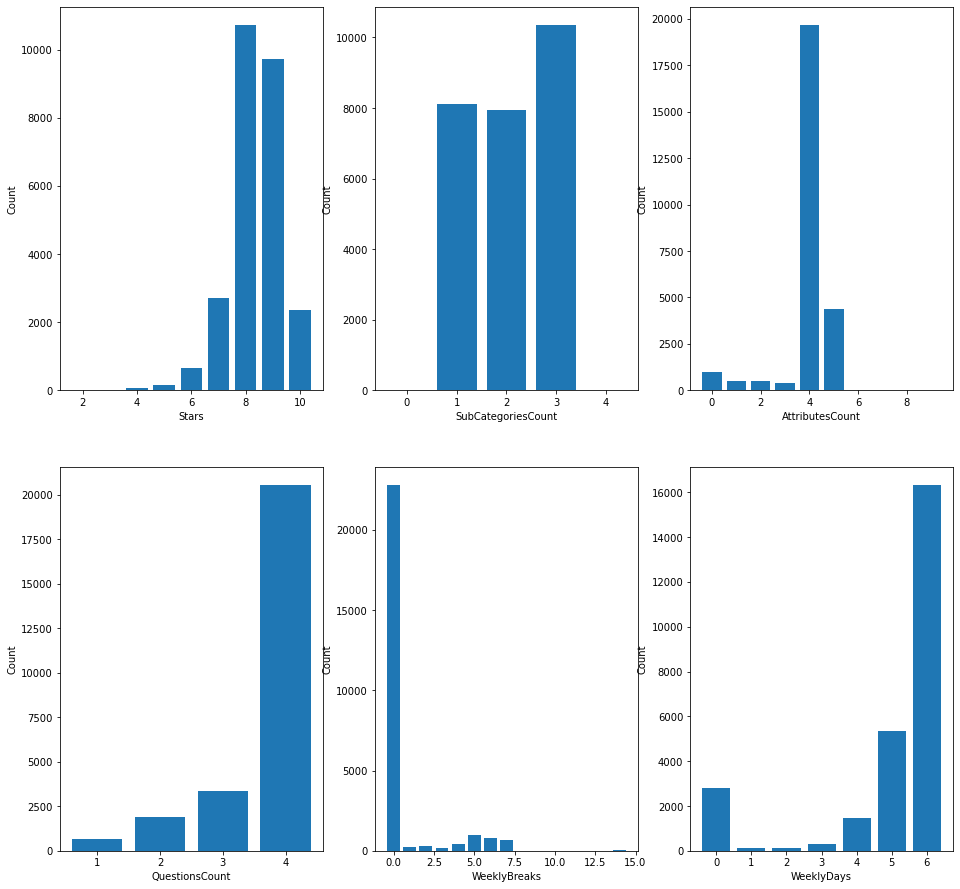

In [20]:
# Shows how much data we have for each value in each feature

if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_countable_columns  
    elements_in_line = 3
    indexs = []
    values = []
    for column in printed_columns:
        if column is not None:
            count_df = df[[target_column, column]].groupby([column]).count()
            
            indexs += [count_df.index]
            values += [count_df[target_column].values.tolist()]            
    
    disply_mluti_bars(indexs, values, printed_columns, 'Count', elements_in_line)
    

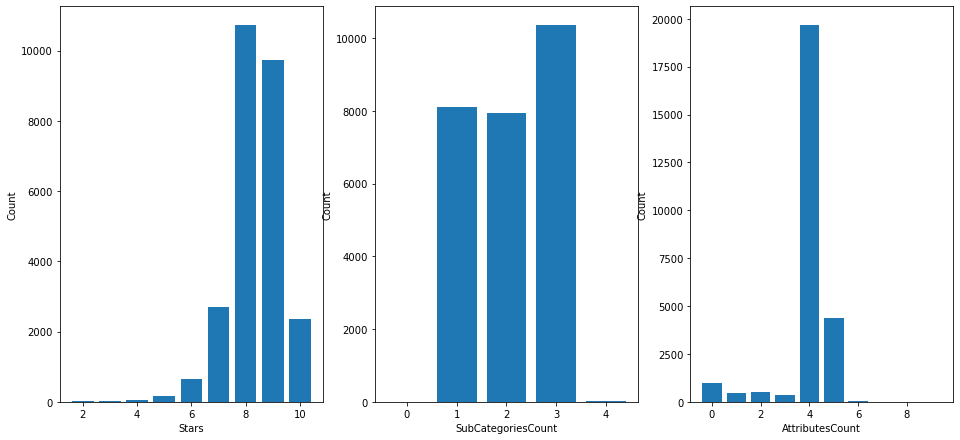

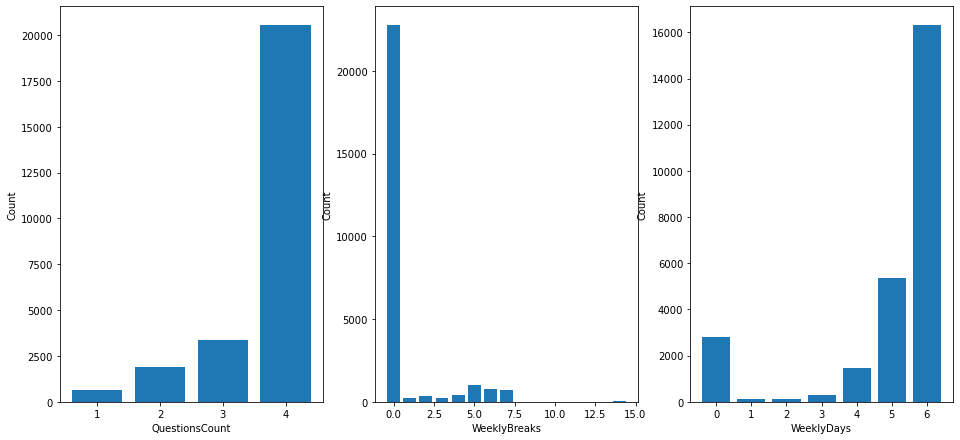

<Figure size 1152x1152 with 0 Axes>

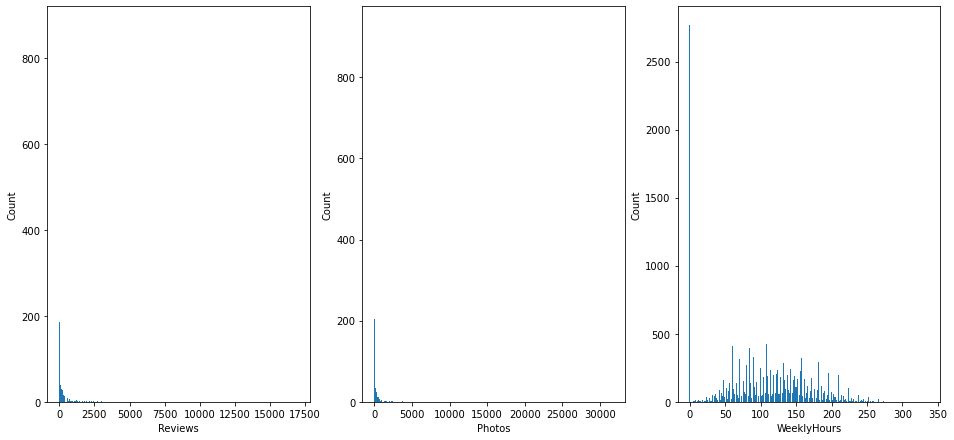

<Figure size 1152x1152 with 0 Axes>

In [21]:
if SHOW_IN_DEVELOPMENT:
    
    printed_columns = prime_countable_columns + prime_non_countable_columns    
    elements_in_line = 3
    printed_columns += np.full(elements_in_line-len(printed_columns)%elements_in_line, None).tolist()
    while len(printed_columns) > 0:
        now_columns = printed_columns[:elements_in_line]
        indexs = []
        values = []
        for column in now_columns:
            if column is None:
                indexs += [None]
                values += [None]
            else:
                count_df = df[[target_column, column]].groupby([column]).count()
            
                indexs += [count_df.index]
                values += [count_df[target_column].values.tolist()]            

        disply_mluti_bars(indexs, values, printed_columns[:elements_in_line], 'Count', elements_in_line)
        printed_columns = printed_columns[elements_in_line:]

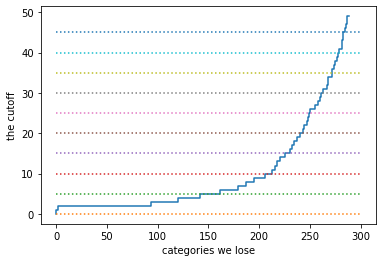

In [22]:
##shows how much features we lose if we decide to limit the amount of instances a category should have to appear
if SHOW_IN_DEVELOPMENT:
    column_values = df.columns.map(lambda x: x.startswith("Cat_"))
    cat_df = df.loc[:, column_values]
    categ = cat_df.sum().sort_values()
    limits = range(50)
    remainders = []
    for limit in limits:
        remainders += [(categ.values<limit).sum()]
    fig= plt.figure()
    ax_graph= fig.add_subplot(1,1,1)
    ax_graph= plt.step(remainders,limits)
    for i in range(0,50,5):
        plt.plot([0,300],[i,i],linestyle= ":" )
    plt.ylabel("the cutoff")
    plt.xlabel("categories we lose")
    plt.show()

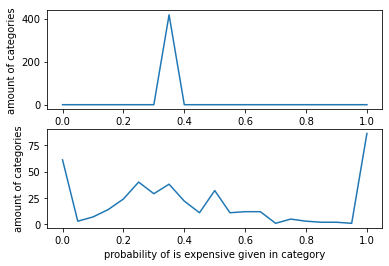

In [23]:
##shows us how much categories we have for different probabilities  
if SHOW_IN_DEVELOPMENT:
    sub_categories = filter(lambda x: x.startswith("Cat_"),df.columns)
    x0 = np.arange(0,1.05,0.05)
    y0 = np.zeros(21)
    x1 = np.arange(0,1.05,0.05)
    y1 = np.zeros(21)
    for category in sub_categories:
        mean_df = df[[target_column, category]].groupby([category]).mean()
        y0[(int)((mean_df.loc[0.0,target_column]*20).round())] += 1
        if (1.0 in mean_df.index):
            y1[(int)((mean_df.loc[1.0,target_column]*20).round())] += 1
    fig = plt.figure()
    ax0_graph = fig.add_subplot(2,1,1)
    plt.plot(x0,y0)
    plt.xlabel("probability of is expensive given not in category")
    plt.ylabel("amount of categories")
    ax1_graph = fig.add_subplot(2,1,2)
    ax1_graph = plt.plot(x1,y1)
    plt.xlabel("probability of is expensive given in category")
    plt.ylabel("amount of categories")
    plt.show()

In [24]:
## create category classes for a data frame
def create_category_class(df_create:pd.DataFrame):
    sub_categories = filter(lambda x: x.startswith("Cat_"),df_create.columns)
    collumn_map = np.empty(16, dtype= object)
    for i in range(collumn_map.shape[0]):
        collumn_map[i] = []
    for category in sub_categories:
        mean_df = df[[target_column, category]].groupby([category]).mean()
        if (1.0 in mean_df.index):
            collumn_map[(int)((mean_df.loc[1.0,target_column]*15).round())] += [category]
    index=0
    for category_class in collumn_map:
        df_create["category_class"+str(index)] = df_create[category_class].sum(axis=1)
        index+=1

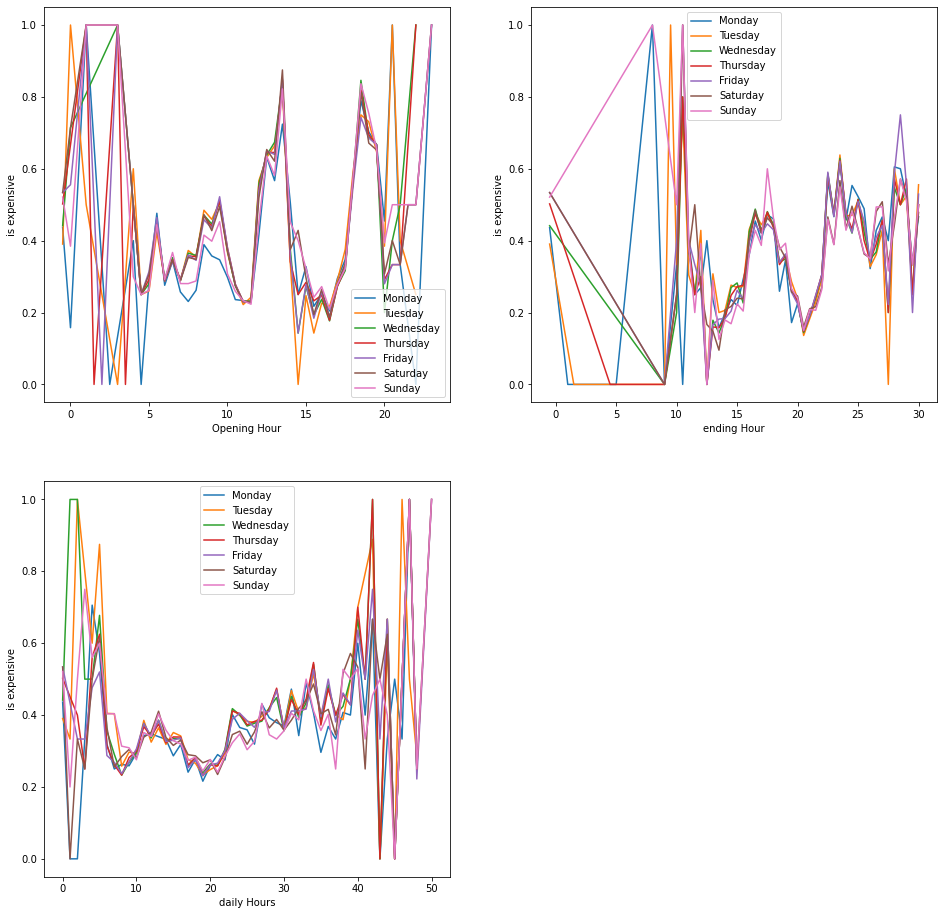

In [25]:
if SHOW_IN_DEVELOPMENT:
    week_days={"1":"Monday","2":"Tuesday","3":"Wednesday","4": "Thursday" , "5":"Friday", "6":"Saturday","7":"Sunday" }
    
    fig = plt.figure(figsize= (16,16))
    ax_open = fig.add_subplot(2,2,1)
    ax_end = fig.add_subplot(2,2,2)     
    ax_count = fig.add_subplot(2,2,3)
    
    #handle the opening hour
    plt.sca(ax_open)
    plt.ylabel("is expensive")
    plt.xlabel("Opening Hour")
    for i in range(7):
        mean_df = df[["OpenHour"+str(i+1),target_column]].groupby(["OpenHour"+str(i+1)]).mean()
        plt.plot(mean_df.index/2,mean_df.values,label = week_days[str(i+1)])
    plt.legend()
    
    #handle the ending hour
    plt.sca(ax_end)
    plt.ylabel("is expensive")
    plt.xlabel("ending Hour")
    for i in range(7):
        mean_df = df[["EndHour"+str(i+1),target_column]].groupby(["EndHour"+str(i+1)]).mean()
        plt.plot(mean_df.index/2,mean_df.values,label = week_days[str(i+1)])
    plt.legend()
    
    #handle count hour
    plt.sca(ax_count)
    plt.ylabel("is expensive")
    plt.xlabel("daily Hours")
    for i in range(7):
        mean_df = df[["CountHour"+str(i+1),target_column]].groupby(["CountHour"+str(i+1)]).mean()
        plt.plot(mean_df.index,mean_df.values,label = week_days[str(i+1)])
    plt.legend()
    
    
    plt.show()

In [26]:
x_sub_train, x_sub_test, y_sub_train, y_sub_test = train_test_split(x_train, y_train, random_state=42)

In [27]:
# Create a Simple model base KNN

knn = KNeighborsClassifier()

knn.fit(x_sub_train, y_sub_train)

score = knn.score(x_sub_test, y_sub_test)
print("Score: ", score)

Score:  0.7828389830508474


In [28]:
# Get the minimum score

dummy_modal = DummyClassifier()

dummy_modal.fit(x_sub_train, y_sub_train)

score = dummy_modal.score(x_sub_test, y_sub_test)
print("Dummy Modal Score: ", score)

Dummy Modal Score:  0.6634382566585957


In [29]:
df_models = pd.DataFrame({
    'Name': [],
    'Score': []
})

def try_multi_models(models):
    global x_sub_train, y_sub_train, x_sub_test, y_sub_test
    global df_models
    
    df_models_add = pd.DataFrame({
    'Name': np.full(len(models), None),
    'Score': np.full(len(models), None)
    })
        
    i = 0
    for model in models:
        df_models_add.at[i, 'Name'] = model['name']
        try:
            model['model'].fit(x_sub_train, y_sub_train)
            
            score = model['model'].score(x_sub_test, y_sub_test)
            df_models_add.at[i, 'Score'] = score
            print(model['name'] + " Score: ", score)
        except:
            print(model['name'] + " Failed!")
        
        i += 1
    
    df_models = pd.concat([df_models, df_models_add])
    df_models.reset_index(drop=True, inplace=True)

In [ ]:
# First tring

models = [
    {
        'name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier()
    }, {
        'name': 'LogisticRegression',
        'model': LogisticRegression()
    }, {
        'name': 'Lasso',
        'model': Lasso()
    }, {
        'name': 'SVC',
        'model': SVC()
    }, {
        'name': 'LinearSVC',
        'model': LinearSVC()
    }, {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier()
    }
]

try_multi_models(models)

KNeighborsClassifier Score:  0.7828389830508474


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Score:  0.8044794188861986
Lasso Score:  0.10304632445555195


In [ ]:
# Try svm models

models = [
    {
        'name': 'OneClassSVM',
        'model': OneClassSVM(gamma='auto')
    }, {
        'name': 'SVR',
        'model': SVR()
    }
]

try_multi_models(models)

In [ ]:
# Try models like Random Forest

models = [
    {
        'name': 'RandomForestRegressor',
        'model': RandomForestRegressor()
    }
]

try_multi_models(models)

In [ ]:
df_models

In [ ]:
df_models.sort_values('Score', ascending=False, inplace=True)
df_models

In [ ]:
# The bast score comes form Random Forest Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Learning about VotingClassifier

vs = VotingClassifier(estimators=[
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression())
])

vs.fit(x_sub_train, y_sub_train)

score = vs.score(x_sub_test, y_sub_test)
print("Voting Classifier Score: ", score)

In [ ]:
rfc = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [200, 500,300,400,600,700],
    
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

grid_search.fit(x_sub_train, y_sub_train)

print(grid_search.best_params_)

score = grid_search.score(x_sub_test, y_sub_test)
print("Score: ", score)

res_as_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
res_as_df

In [ ]:
scaler = StandardScaler()
x_sub_train=scaler.fit_transform(X=x_sub_train)
x_sub_test=scaler.transform(x_sub_test)

In [ ]:
models = [
    {
        'name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier()
    }, {
        'name': 'LogisticRegression',
        'model': LogisticRegression()
    }, {
        'name': 'Lasso',
        'model': Lasso()
    }, {
        'name': 'SVC',
        'model': SVC()
    }, {
        'name': 'LinearSVC',
        'model': LinearSVC()
    }, {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier()
    }
]

try_multi_models(models)